In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
df = pd.read_spss('project3改-集群分析資料.sav')
df["QCL_1"] = df["QCL_1"].astype("int")
df

,a1,a2,a3,a4,a5,a6,a7,a8,q1,q2,...,FAC5,FAC6,FAC7,FAC8,FAC9,FAC10,FAC11,FAC12,FAC13,QCL_1
0,男,北部,尚未工作,"NT$ 150,000 - 199,999",4.0,新聞,3C、科技,球類、游泳、韻律、健身房等活動,同意,有一點不同意,...,0.070177,0.289753,0.184707,0.558053,-1.321927,1.606639,0.141024,0.272209,-0.786470,5
1,男,北部,尚未工作,"NT$ 200,000及以上",6.0,綜藝節目,3C、科技,上網咖、網際網路或BBS站,有一點同意,同意,...,-0.985151,-0.326985,1.136460,1.442899,1.200609,-0.094909,-1.436634,-0.113045,1.743963,2
2,男,北部,尚未工作,"NT$ 100,000 - 149,999",4.0,綜藝節目,休閒、旅遊,看電視、電影、MTV或唱KTV,有一點同意,同意,...,0.889189,0.199897,0.244788,-0.921362,-0.070024,-0.095636,-0.792641,1.017360,-0.682559,1
3,男,北部,尚未工作,"NT$ 99,999及以下",2.0,新聞,影視娛樂,閱讀報章、雜誌、小說及漫畫,有一點同意,有一點同意,...,-0.831536,0.346205,-0.506742,-0.464816,-0.773009,0.631529,-0.261633,-0.124102,-0.563196,3
4,男,北部,尚未工作,"NT$ 200,000及以上",2.0,體育,影視娛樂,球類、游泳、韻律、健身房等活動,同意,同意,...,0.880978,0.392306,0.275587,0.591628,-1.566337,1.204995,-0.270782,0.442900,-1.055709,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,女,南部,個人自由業 (SOHO族、家教、補教老師….),不知道,2.0,日韓戲劇,新聞、社會評論,看電視、電影、MTV或唱KTV,有一點不同意,同意,...,1.961135,-1.568589,1.672441,-0.304585,2.025184,-1.720910,1.526108,-0.195419,0.729224,1
454,女,南部,個人自由業 (SOHO族、家教、補教老師….),"NT$ 100,000 - 149,999",2.0,知識、教育,流行、時尚,逛街或購物,同意,有一點同意,...,1.665637,-0.702683,0.198756,1.521267,0.446416,-1.190234,1.117925,0.409073,0.510509,1
455,女,南部,個人自由業 (SOHO族、家教、補教老師….),"NT$ 100,000 - 149,999",1.0,綜藝節目,流行、時尚,看電視、電影、MTV或唱KTV,有一點同意,有一點同意,...,0.256224,0.766453,-0.514771,0.348277,0.051459,1.082833,-0.321590,0.839859,0.526624,1
456,女,南部,學校方面行業,"NT$ 150,000 - 199,999",2.5,日韓戲劇,流行、時尚,逛街或購物,有一點同意,有一點不同意,...,0.496211,0.670454,0.131345,1.585086,-0.858768,-0.074743,0.286286,-1.069360,0.071286,5


In [25]:
picture = df.iloc[:,0:8]
picture["QCL_1"]= df["QCL_1"]
picture["Count"] = 1
picture

,a1,a2,a3,a4,a5,a6,a7,a8,QCL_1,Count
0,男,北部,尚未工作,"NT$ 150,000 - 199,999",4.0,新聞,3C、科技,球類、游泳、韻律、健身房等活動,5,1
1,男,北部,尚未工作,"NT$ 200,000及以上",6.0,綜藝節目,3C、科技,上網咖、網際網路或BBS站,2,1
2,男,北部,尚未工作,"NT$ 100,000 - 149,999",4.0,綜藝節目,休閒、旅遊,看電視、電影、MTV或唱KTV,1,1
3,男,北部,尚未工作,"NT$ 99,999及以下",2.0,新聞,影視娛樂,閱讀報章、雜誌、小說及漫畫,3,1
4,男,北部,尚未工作,"NT$ 200,000及以上",2.0,體育,影視娛樂,球類、游泳、韻律、健身房等活動,5,1
...,...,...,...,...,...,...,...,...,...,...
453,女,南部,個人自由業 (SOHO族、家教、補教老師….),不知道,2.0,日韓戲劇,新聞、社會評論,看電視、電影、MTV或唱KTV,1,1
454,女,南部,個人自由業 (SOHO族、家教、補教老師….),"NT$ 100,000 - 149,999",2.0,知識、教育,流行、時尚,逛街或購物,1,1
455,女,南部,個人自由業 (SOHO族、家教、補教老師….),"NT$ 100,000 - 149,999",1.0,綜藝節目,流行、時尚,看電視、電影、MTV或唱KTV,1,1
456,女,南部,學校方面行業,"NT$ 150,000 - 199,999",2.5,日韓戲劇,流行、時尚,逛街或購物,5,1


### 使用PCA 降到2維看看

In [3]:
fca_data = df.iloc[:,49:62]
fca_data

,FAC1,FAC2,FAC3,FAC4,FAC5,FAC6,FAC7,FAC8,FAC9,FAC10,FAC11,FAC12,FAC13
0,0.198913,-0.175019,1.089674,-0.130921,0.070177,0.289753,0.184707,0.558053,-1.321927,1.606639,0.141024,0.272209,-0.786470
1,1.499282,1.881683,-0.218417,-2.125715,-0.985151,-0.326985,1.136460,1.442899,1.200609,-0.094909,-1.436634,-0.113045,1.743963
2,0.907833,0.332130,-1.190586,-0.714407,0.889189,0.199897,0.244788,-0.921362,-0.070024,-0.095636,-0.792641,1.017360,-0.682559
3,0.466866,0.524069,0.738584,0.101138,-0.831536,0.346205,-0.506742,-0.464816,-0.773009,0.631529,-0.261633,-0.124102,-0.563196
4,0.423948,0.662775,-0.033193,0.234243,0.880978,0.392306,0.275587,0.591628,-1.566337,1.204995,-0.270782,0.442900,-1.055709
...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,-0.406347,-1.100478,-0.593379,-1.567270,1.961135,-1.568589,1.672441,-0.304585,2.025184,-1.720910,1.526108,-0.195419,0.729224
454,0.394239,-0.465179,-0.601956,0.772805,1.665637,-0.702683,0.198756,1.521267,0.446416,-1.190234,1.117925,0.409073,0.510509
455,0.311703,-1.755726,0.415953,0.188553,0.256224,0.766453,-0.514771,0.348277,0.051459,1.082833,-0.321590,0.839859,0.526624
456,-0.484190,-0.292895,2.242387,-1.173275,0.496211,0.670454,0.131345,1.585086,-0.858768,-0.074743,0.286286,-1.069360,0.071286


In [5]:
# 我們只要最大的兩個主成分。scikit-learn 會自動幫我們
# 依照 eigenvalue 的大小排序共變異數矩陣的 eigenvectors
n_components = 2
random_state = 9527
pca = PCA(n_components=n_components, 
          random_state=random_state)

In [9]:
New_fca_data = pca.fit_transform(fca_data)
New_fca_data = pd.DataFrame(New_fca_data)
New_fca_data["QCL_1"]= df["QCL_1"]
New_fca_data

,0,1,QCL_1
0,-0.703508,-1.532659,5
1,1.394026,0.242182,2
2,0.718234,1.230881,1
3,0.063542,-0.240535,3
4,0.146396,-1.067742,5
...,...,...,...
453,-1.072041,1.518502,1
454,-0.745165,-0.687764,1
455,-0.739470,-0.976257,1
456,-0.809999,-2.412593,5


In [20]:
New_fca_data.groupby("QCL_1")
New_fca_data.iloc[:, 0]

0     -0.703508
1      1.394026
2      0.718234
3      0.063542
4      0.146396
         ...   
453   -1.072041
454   -0.745165
455   -0.739470
456   -0.809999
457   -0.527135
Name: 0, Length: 458, dtype: float64

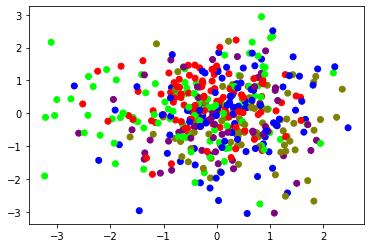

In [28]:
plt.scatter(fca_data.iloc[:, 0], fca_data.iloc[:, 3], c=New_fca_data.iloc[:, 2], cmap='brg')
# plt.axis('equal')

### 畫圖設定

In [38]:
font = {'family' : 'SimSun',
'weight': 'bold',
'size'  : '14'}
plt.rc('font', **font)        # 步驟一（設定字型的更多屬性）
plt.rc('axes', unicode_minus=False) # 步驟二（解決座標軸負數的負號顯示問題）

In [39]:
clusters = ['小資獨立型','上流跟風型','網路御宅型','務實生活型','自由個性型']
x1 = [1,2,3,4,5]

### 開始作圖

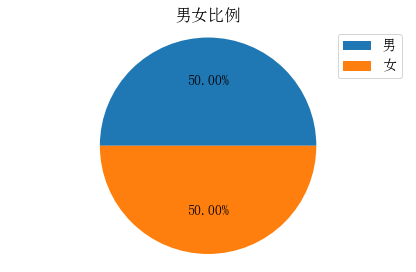

In [40]:
# plt.figure(figsize=(9, 6)) 
# plt.style.use('ggplot')
labels = ["男","女"]
plt.pie(picture.groupby(["a1"]).count()["Count"], autopct = "%2.2f%%")
plt.title("男女比例")
plt.axis('equal')
plt.legend(labels=labels)
plt.tight_layout()
plt.savefig('男女比例.png', dpi=300)
plt.show()

In [41]:
picture.groupby(["a1"]).count()["Count"]

a1
女    229
男    229
Name: Count, dtype: int64

### a1請問您的性別是？

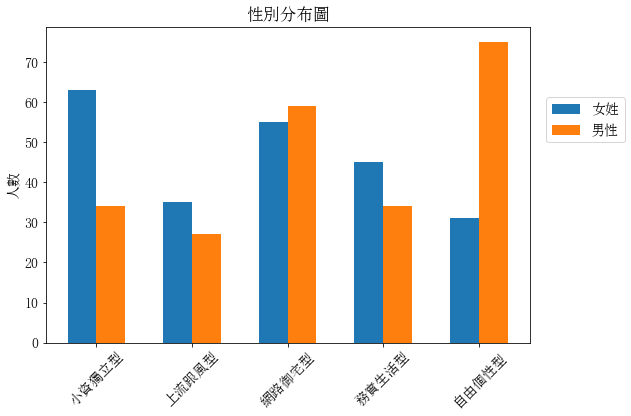

In [42]:
girls=[63,35,55,45,31]
boys = [34,27,59,34,75]

# 比起堆疊長條圖，分組長條圖稍微調整數據以達到效果
width = 0.3 #先設定每個長條的寬度
plt.figure(figsize=(9, 6)) 
plt.bar([i-width/2 for i in x1], girls, width=width, label='女姓') #注意這裡的X軸座標為x1中的數據減去寬度的一半
plt.bar([i+width/2 for i in x1], boys, width=width, label='男性') #注意這裡的X軸座標為x1中的數據加上寬度的一半
plt.xticks(x1,clusters, rotation=45)
plt.title("性別分布圖")
plt.ylabel("人數")
plt.legend( bbox_to_anchor=(1.02,0.8))
plt.tight_layout()
plt.savefig('集群性別分布.png', dpi=300)
plt.show()

### a2請問您的居住地區是？

In [43]:
picture.groupby(["QCL_1","a2"]).size().values

array([30, 24, 43, 15, 21, 26, 49, 44, 21, 31, 30, 18, 28, 41, 37],
      dtype=int64)

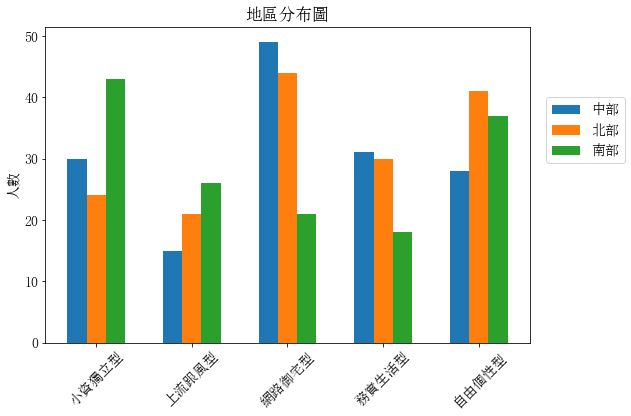

In [44]:
y1 = [30,15,49,31,28]
y2 = [24,21,44,30,41]
y3 = [43,26,21,18,37]

# 比起堆疊長條圖，分組長條圖稍微調整數據以達到效果
width = 0.2 #先設定每個長條的寬度
plt.figure(figsize=(9, 6)) 
plt.bar([i-width for i in x1], y1, width=width, label='中部') 
plt.bar([i for i in x1], y2, width=width, label='北部') 
plt.bar([i+width for i in x1], y3, width=width, label='南部')
plt.xticks(x1,clusters, rotation=45)
plt.ylabel("人數")
plt.title("地區分布圖")
plt.legend(bbox_to_anchor=(1.02,0.8))
plt.tight_layout()
plt.savefig('集群地區分布.png', dpi=300)
plt.show()

### a3請問您目前從事的工作，是屬於以下哪一個行業?

In [45]:
picture.groupby(["QCL_1","a3"]).size().values

array([ 7,  1,  6,  8,  0, 17,  4,  6,  2,  1,  2,  9,  0, 11,  1,  4, 10,
        5,  3,  2,  1,  8,  2,  0, 16,  3,  4,  0,  2,  1,  5,  0, 10,  0,
        1,  2,  3,  2,  6,  0,  1,  6,  0, 32,  3,  4,  1,  3,  0, 11,  0,
       25,  0,  4,  5,  5,  8,  3,  1,  8,  3,  1, 21,  1,  4,  0,  3,  1,
       10,  0, 11,  1,  3,  4,  4,  0,  4,  0, 12,  6,  2, 26,  1,  7,  1,
        4,  1,  9,  1, 14,  1,  3,  7,  3,  4], dtype=int64)

In [46]:
a3 = np.zeros((19,5))
for k in range(19):
    a3[k,:] = np.array([i for i in picture.groupby(["QCL_1","a3"]).size()[k::19]])

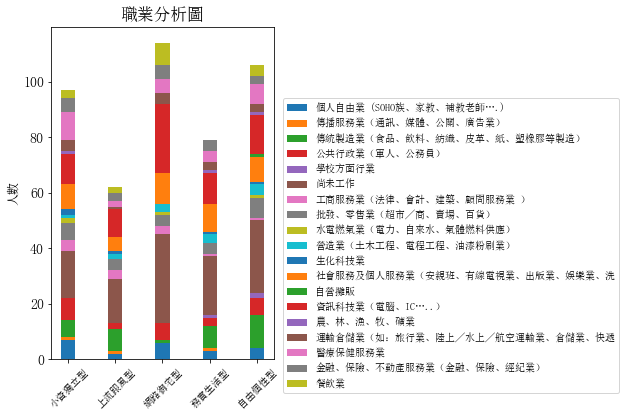

In [47]:
width = 0.3 #先設定每個長條的寬度

sum = np.zeros(5) #記住Bottom位置用
labels = picture.groupby("a3").count().index 

plt.figure(figsize=(9, 6)) 

for x in range(19):
    plt.bar(x1, a3[x,:], bottom=sum, width=width, label=labels[x])
    sum += a3[x,:]

plt.xticks(x1,clusters, rotation=45, fontsize=10)
plt.ylabel("人數", fontsize=12)
plt.title("職業分析圖")
plt.legend(fontsize=10, bbox_to_anchor=(1.02,0.8))
plt.tight_layout()
plt.show()

### a4請問您全家的平均月收入？

In [48]:
# print(picture.groupby(["QCL_1","a4"]).count()["Count"])
picture.groupby(["QCL_1","a4"]).size().values

array([25, 38, 16, 10,  8, 14, 26, 12,  7,  3, 19, 48, 17, 19, 11, 19, 24,
       23,  7,  6, 23, 28, 31, 14, 10], dtype=int64)

In [49]:
a4 = np.zeros((5,5))
for k in range(5):
    a4[k,:] = np.array([i for i in picture.groupby(["QCL_1","a4"]).size()[k::5]])

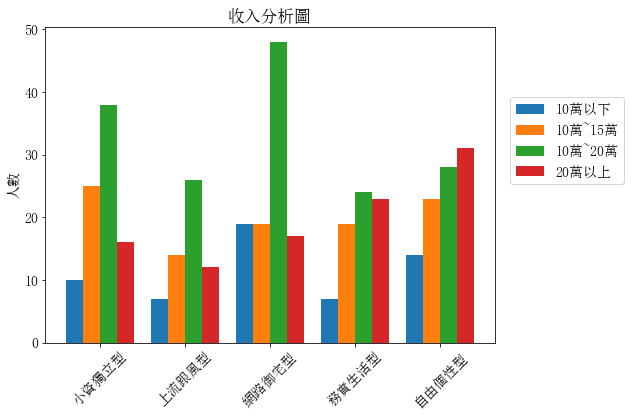

In [50]:
width = 0.2 #先設定每個長條的寬度
plt.figure(figsize=(9, 6)) 
plt.bar([i-3*width/2 for i in x1], a4[3,:], width=width, label="10萬以下")
plt.bar([i-width/2 for i in x1], a4[0,:], width=width, label="10萬~15萬")
plt.bar([i+width/2 for i in x1], a4[1,:], width=width, label="10萬~20萬") 
plt.bar([i+3*width/2 for i in x1], a4[2,:], width=width, label="20萬以上")
plt.xticks(x1,clusters, rotation=45)
plt.ylabel("人數")
plt.title("收入分析圖")
plt.legend(bbox_to_anchor=(1.02,0.8))
plt.tight_layout()
plt.savefig('集群收入分布.png', dpi=300)
plt.show()

### a5平均而言，請問你一天會花多少小時在手機上?

##### 把a5手機使用時數轉成區間

In [51]:
group_names = ['<2','2~4','4~6','>6']
picture['手機使用時數'] = pd.cut(picture["a5"], [0, 2, 4, 6, 16], labels=group_names)

In [52]:
picture.groupby(["QCL_1","手機使用時數"]).count()["Count"]

QCL_1  手機使用時數
1      <2        18
       2~4       30
       4~6       24
       >6        25
2      <2         8
       2~4       24
       4~6       15
       >6        15
3      <2        17
       2~4       42
       4~6       30
       >6        25
4      <2        14
       2~4       22
       4~6       29
       >6        14
5      <2        15
       2~4       47
       4~6       23
       >6        21
Name: Count, dtype: int64

In [53]:
a5 = np.zeros((4,5))
for k in range(4):
    a5[k,:] = np.array([i for i in picture.groupby(["QCL_1","手機使用時數"]).size()[k::4]])

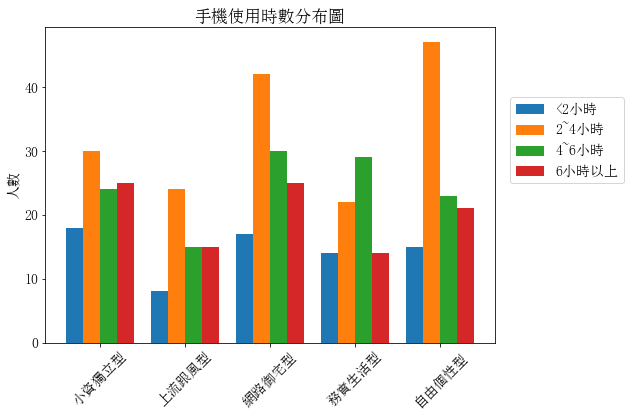

In [54]:
width = 0.2 #先設定每個長條的寬度
plt.figure(figsize=(9, 6))

plt.bar([i-3*width/2 for i in x1], a5[0,:], width=width, label="<2小時")
plt.bar([i-width/2 for i in x1], a5[1,:], width=width, label="2~4小時")
plt.bar([i+width/2 for i in x1], a5[2,:], width=width, label="4~6小時") 
plt.bar([i+3*width/2 for i in x1], a5[3,:], width=width, label="6小時以上")
plt.xticks(x1,clusters, rotation=45)
plt.ylabel("人數")
plt.title("手機使用時數分布圖")
plt.legend(bbox_to_anchor=(1.02,0.8))
plt.tight_layout()
plt.savefig('集群手機使用時數.png', dpi=300)
plt.show()

### a6你最喜歡收看哪類型的節目?

In [55]:
# print(picture.groupby(["QCL_1","a6"]).count()["Count"])
picture.groupby(["QCL_1","a6"]).size().values

array([10,  8,  4,  0,  9, 13,  2, 13,  6, 13,  5,  2,  8,  4,  6,  6,  1,
        0,  6,  4,  0,  8,  5, 14,  2,  0,  3,  7, 10, 11,  1,  0, 18,  8,
        0,  7,  7, 27,  7,  4, 10,  4,  9, 13,  0,  0,  6,  6,  0,  4,  3,
       17,  5,  1,  4, 11,  7,  8,  1,  3, 18, 12,  0, 11,  3, 14,  3,  9,
        6, 11], dtype=int64)

In [56]:
a6 = np.zeros((14,5))
for k in range(14):
    a6[k,:] = np.array([i for i in picture.groupby(["QCL_1","a6"]).size()[k::14]])

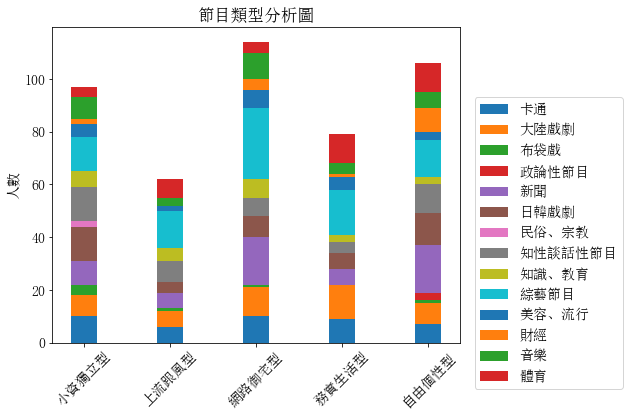

In [57]:
width = 0.3 #先設定每個長條的寬度

sum = np.zeros(5) #記住Bottom位置用
labels = picture.groupby("a6").count().index 

plt.figure(figsize=(9, 6)) 

for x in range(14):
    plt.bar(x1, a6[x,:], bottom=sum, width=width, label=labels[x])
    sum += a6[x,:]

plt.xticks(x1,clusters, rotation=45)
plt.ylabel("人數")
plt.title("節目類型分析圖")
plt.legend(bbox_to_anchor=(1.02,0.8))
plt.tight_layout()
plt.savefig('集群節目類型分布.png', dpi=300)
plt.show()

### a7你最喜歡閱讀哪類型的雜誌/週刊?

In [58]:
# print(picture.groupby(["QCL_1","a7"]).count()["Count"])
picture.groupby(["QCL_1","a7"]).size().values

array([13, 10, 22, 15,  3,  3, 11, 12,  3,  1,  4, 10,  8,  2, 10,  4,  3,
        9, 11,  2,  1,  2, 20, 10, 10, 15,  5,  1, 28, 16,  5,  0,  4, 10,
        9,  4, 13,  1,  6, 12, 10,  5,  5,  4, 21, 12, 31, 10,  3,  3, 12,
        4,  7,  2,  1], dtype=int64)

In [59]:
a7 = np.zeros((11,5))
for k in range(11):
    a7[k,:] = np.array([i for i in picture.groupby(["QCL_1","a7"]).size()[k::11]])

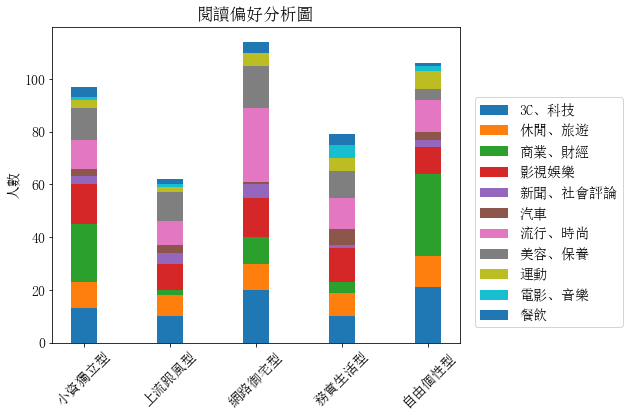

In [60]:
width = 0.3 #先設定每個長條的寬度

sum = np.zeros(5) #記住Bottom位置用
labels = picture.groupby("a7").count().index        

plt.figure(figsize=(9, 6)) 

for x in range(11):
    plt.bar(x1, a7[x,:], bottom=sum, width=width, label=labels[x])
    sum += a7[x,:]

plt.xticks(x1,clusters, rotation=45)
plt.ylabel("人數")
plt.title("閱讀偏好分析圖")
plt.legend(bbox_to_anchor=(1.02,0.8))
plt.tight_layout()
plt.savefig('集群閱讀偏好分布.png', dpi=300)
plt.show()

### a8你最喜歡的休閒活動?

In [61]:
# print(picture.groupby(["QCL_1","a8"]).count()["Count"])
picture.groupby(["QCL_1","a8"]).size().values

array([15,  0,  1,  1,  3,  7,  4, 40, 12, 14,  6,  1,  0,  1,  1,  6,  2,
       23, 16,  6,  9,  1,  1,  4,  1, 15,  6, 46, 19, 12, 10,  0,  0,  0,
        1, 12,  6, 28, 15,  7, 10,  2,  1,  1,  1, 18, 11, 29, 20, 13],
      dtype=int64)

In [62]:
a8 = np.zeros((10,5))
for k in range(10):
    a8[k,:] = np.array([i for i in picture.groupby(["QCL_1","a8"]).size()[k::10]])

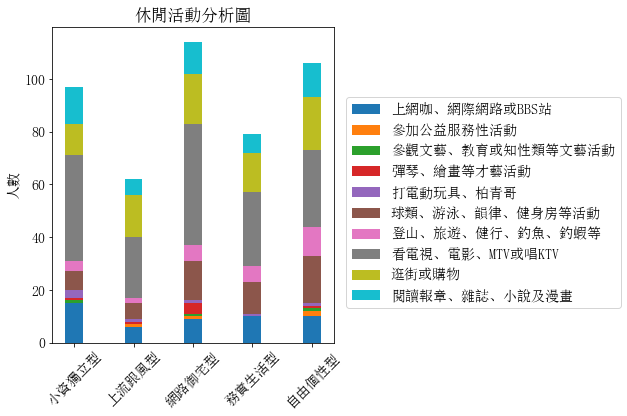

In [63]:
width = 0.3 #先設定每個長條的寬度

sum = np.zeros(5) #記住Bottom位置用
labels = picture.groupby("a8").count().index #標籤       

plt.figure(figsize=(9, 6)) 

for x in range(10):
    plt.bar(x1, a8[x,:], bottom=sum, width=width, label=labels[x])
    sum += a8[x,:]

plt.xticks(x1,clusters, rotation=45)
plt.ylabel("人數")
plt.title("休閒活動分析圖")
plt.legend(bbox_to_anchor=(1.02,0.8))
plt.tight_layout()
plt.savefig('集群休閒活動分布.png', dpi=300)
plt.show()